## Simple Returns

In [8]:
from datetime import datetime

import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

import yfinance as yf
yf.pdr_override()

In [2]:
PG = wb.get_data_yahoo('PG', datetime(1995, 1, 1))
PG

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,15.468750,15.625000,15.437500,15.593750,7.771261,3318400
1995-01-04,15.531250,15.656250,15.312500,15.468750,7.708962,2218800
1995-01-05,15.375000,15.437500,15.218750,15.250000,7.599951,2319600
1995-01-06,15.156250,15.406250,15.156250,15.281250,7.615522,3438000
1995-01-09,15.343750,15.406250,15.187500,15.218750,7.584374,1795200
...,...,...,...,...,...,...
2023-03-06,140.729996,141.139999,139.940002,140.350006,140.350006,4943100
2023-03-07,140.429993,140.619995,137.339996,137.559998,137.559998,5606800
2023-03-08,137.199997,137.690002,136.600006,137.580002,137.580002,5518800


In [3]:
PG.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-06,140.729996,141.139999,139.940002,140.350006,140.350006,4943100
2023-03-07,140.429993,140.619995,137.339996,137.559998,137.559998,5606800
2023-03-08,137.199997,137.690002,136.600006,137.580002,137.580002,5518800
2023-03-09,138.149994,138.559998,136.100006,136.570007,136.570007,4467200
2023-03-10,136.949997,137.990005,136.350006,137.190002,137.190002,5908500


### Simple Rate of Return

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

In [5]:
PG['simple_return'] = (PG['Adj Close'] / PG['Adj Close'].shift(1)) -1
print(PG['simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2023-03-06   -0.004257
2023-03-07   -0.019879
2023-03-08    0.000145
2023-03-09   -0.007341
2023-03-10    0.004540
Name: simple_return, Length: 7097, dtype: float64


**Visualize simple returns**

<Axes: xlabel='Date'>

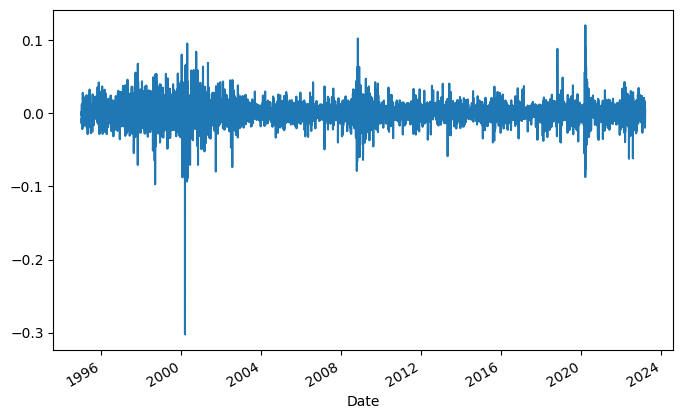

In [9]:
PG['simple_return'].plot(figsize=(8, 5))

**Calculate daily average rate of return**

In [10]:
avg_returns_d = PG['simple_return'].mean()
avg_returns_d

0.0005043453115428584

**Anualize the average daily rate of return**


In [11]:
avg_returns_a = PG['simple_return'].mean() * 250  # account for number of trading days != 365
avg_returns_a

0.12608632788571458

**The number shown above is an approximation of the annual rate of return per year**

In [12]:
print(f"{round(avg_returns_a, 5) * 100} %")

12.609 %


If daily returns are $r_1, r_2, ..., r_{250}$, then the annual return, $R$, is given by $1 + R = (1 + r_1)(1 + r_2)...(1 + r_{250})$. By taking the logarithms and using the approximation $ln(1 + x) \approx x$ we get:

$$
R = \sum_{i=1}^{250}r_i
$$

https://quant.stackexchange.com/questions/51677/why-multiply-stock-returns-with-sqrt252